## Insaid Project On Fraud Transection Classification

**Import some important Libraries**

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [128]:
import warnings
warnings.filterwarnings('ignore')

In [129]:
df = pd.read_csv('Fraud.csv')

In [130]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [132]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [133]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [10]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

## Cleaning of data

**Replace type column by Number encoding**

In [11]:
df.replace({'PAYMENT':1, 'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5}, inplace=True)

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
df['nameOrig'] = df['nameOrig'].str.replace(r'\D', '').astype(int)

In [14]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,2,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,3,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(4), object(1)
memory usage: 509.7+ MB


In [16]:
df['nameDest'] = df['nameDest'].str.replace(r'\D', '').astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(2), int64(4)
memory usage: 485.4 MB


**As we can see from above info that All the given data has been cleaned so we use this for further implementaion of ML models** 

In [18]:
df['isFlaggedFraud'] = np.where(df['isFlaggedFraud']>200,1,0)

In [19]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


**Heat Map**

<AxesSubplot:>

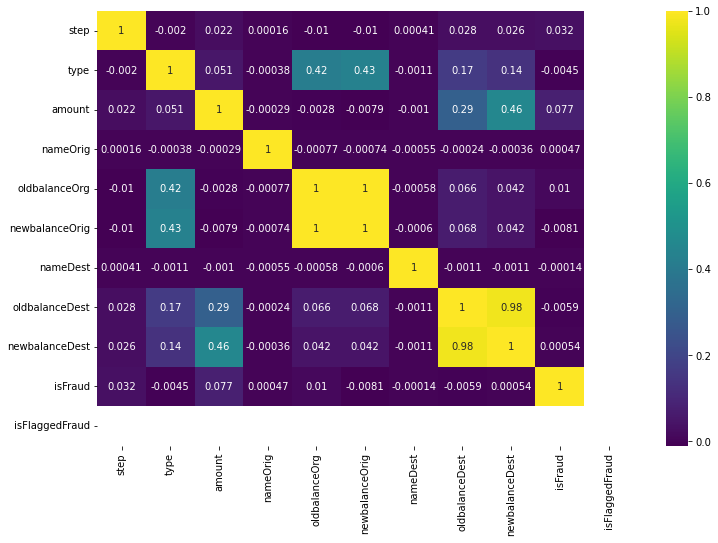

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [46]:
df.corr()['isFraud']

step              0.031578
type             -0.004463
amount            0.076688
nameOrig          0.000470
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
nameDest         -0.000141
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

**Here, we can drop one of the two variable which are highly correlated**

In [134]:
df.drop(['newbalanceOrig','oldbalanceDest'],axis=1,inplace=True)

**Defining input features and Target**

In [135]:
X=df.drop('isFraud',axis=1)
y=df.isFraud.values

In [136]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,0.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,0


In [137]:
y

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

<AxesSubplot:>

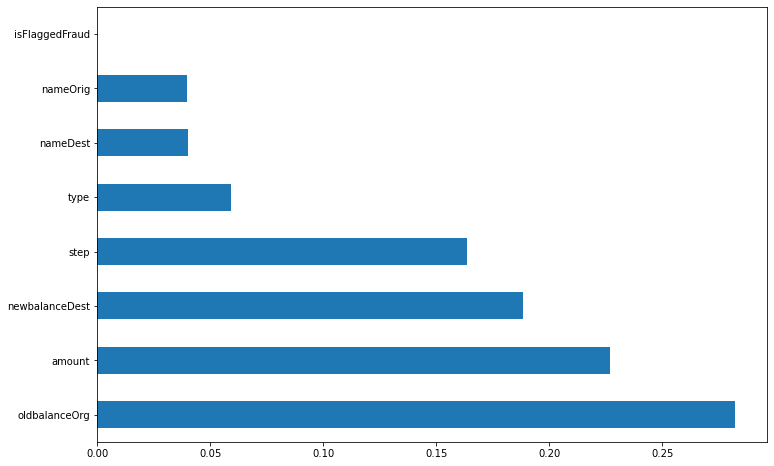

In [66]:
## Important feature using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

plt.figure(figsize=(12,8))
feature_imp = pd.Series(selection.feature_importances_, index = X.columns)
feature_imp.nlargest(20).plot(kind='barh')

## Agrregation of columns

In [138]:
numeric_cols = ['nameOrig','amount','oldbalanceOrg','newbalanceDest']
numeric_df = df[numeric_cols]
agg = numeric_df.groupby('nameOrig').agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
agg.columns = ['nameOrig','count_amount','mean_amout','max_amount','min_amount','sum_amount',
               'count_oldbalaceOrg','mean_oldbalanceOrg','max_oldbalanceOrg','min_oldbalanceOrg','sum_oldbalanceOrg',
               'count_newbalanceDest','mean_newbalanceDest','max_newbalanceDest','min_newbalnceDest','sum_newbalncedest']
df = df.merge(agg,how = 'left', on = 'nameOrig')

In [139]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,newbalanceDest,isFraud,isFlaggedFraud,count_amount,...,count_oldbalaceOrg,mean_oldbalanceOrg,max_oldbalanceOrg,min_oldbalanceOrg,sum_oldbalanceOrg,count_newbalanceDest,mean_newbalanceDest,max_newbalanceDest,min_newbalnceDest,sum_newbalncedest
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,0,0,1,...,1,170136.0,170136.0,170136.0,170136.0,1,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,0,0,1,...,1,21249.0,21249.0,21249.0,21249.0,1,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,1,0,1,...,1,181.0,181.0,181.0,181.0,1,0.0,0.0,0.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,0.0,1,0,1,...,1,181.0,181.0,181.0,181.0,1,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,0,0,1,...,1,41554.0,41554.0,41554.0,41554.0,1,0.0,0.0,0.0,0.0


In [140]:
df.drop(['nameOrig','oldbalanceOrg','nameDest','newbalanceDest'],axis=1,inplace=True)

In [141]:
df.drop(['amount'],axis=1,inplace=True)

In [79]:
df.head()

,step,type,isFraud,isFlaggedFraud,count_amount,mean_amout,max_amount,min_amount,sum_amount,count_oldbalaceOrg,mean_oldbalanceOrg,max_oldbalanceOrg,min_oldbalanceOrg,sum_oldbalanceOrg,count_newbalanceDest,mean_newbalanceDest,max_newbalanceDest,min_newbalnceDest,sum_newbalncedest
0,1,1,0,0,1,9839.64,9839.64,9839.64,9839.64,1,170136.0,170136.0,170136.0,170136.0,1,0.0,0.0,0.0,0.0
1,1,1,0,0,1,1864.28,1864.28,1864.28,1864.28,1,21249.0,21249.0,21249.0,21249.0,1,0.0,0.0,0.0,0.0
2,1,2,1,0,1,181.00,181.00,181.00,181.00,1,181.0,181.0,181.0,181.0,1,0.0,0.0,0.0,0.0
3,1,3,1,0,1,181.00,181.00,181.00,181.00,1,181.0,181.0,181.0,181.0,1,0.0,0.0,0.0,0.0
4,1,1,0,0,1,11668.14,11668.14,11668.14,11668.14,1,41554.0,41554.0,41554.0,41554.0,1,0.0,0.0,0.0,0.0


**Split data into training data and testing data**

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
sum(y_train)

5547

In [82]:
len(y_train)

4262955

In [83]:
sum(y_test)/len(y_test)

0.0012697263611099866

## Implementation of machine learning model

#Since the problem given to us is a classification problem so we use models which are used in classifications

**Random forest classifier**

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rfc = RandomForestClassifier(class_weight={0:0.1,1:0.9},n_jobs=-1)

In [86]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, n_jobs=-1)

In [87]:
rcf_preds = rfc.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,rcf_preds))
print('-----------------------------------------------------------\n')
print('Confusion metrix\n')
print(confusion_matrix(y_test, rcf_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.99      0.73      0.84      2666

    accuracy                           1.00   2099665
   macro avg       0.99      0.86      0.92   2099665
weighted avg       1.00      1.00      1.00   2099665

-----------------------------------------------------------

Confusion metrix

[[2096976      23]
 [    732    1934]]


<AxesSubplot:>

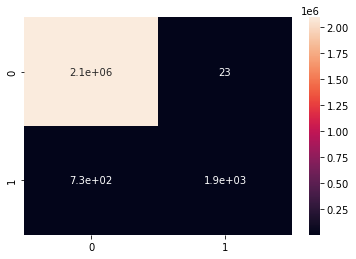

In [102]:
sns.heatmap(confusion_matrix(y_test, rcf_preds),annot=True)

**xgboost classifier**

In [89]:
from xgboost import XGBClassifier

In [90]:
model_xgb = XGBClassifier()
    
model_xgb.fit(X_train, y_train)
preds_xgb = model_xgb.predict(X_test)

[10:41:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [91]:
preds_xgb 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,preds_xgb))
print('-----------------------------------------------------------\n')
print('Confusion metrix\n')
print(confusion_matrix(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.97      0.77      0.86      2666

    accuracy                           1.00   2099665
   macro avg       0.98      0.88      0.93   2099665
weighted avg       1.00      1.00      1.00   2099665

-----------------------------------------------------------

Confusion metrix

[[2096934      65]
 [    622    2044]]


<AxesSubplot:>

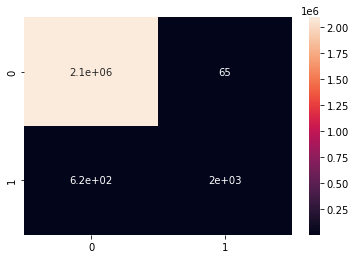

In [97]:
sns.heatmap(confusion_matrix(y_test, preds_xgb),annot=True)

**Gradient Boosting Classifier**

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train,y_train)
preds_gb = model_gb.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,preds_gb))
print('-----------------------------------------------------------\n')
print('Confusion metrix\n')
print(confusion_matrix(y_test, preds_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.58      0.05      0.09      2666

    accuracy                           1.00   2099665
   macro avg       0.79      0.52      0.54   2099665
weighted avg       1.00      1.00      1.00   2099665

-----------------------------------------------------------

Confusion metrix

[[2096907      92]
 [   2540     126]]


<AxesSubplot:>

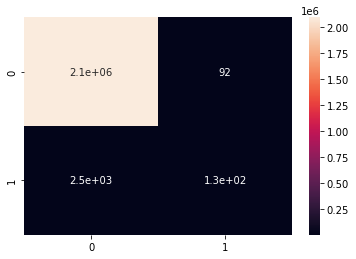

In [111]:
sns.heatmap(confusion_matrix(y_test, preds_gb),annot=True)

**catboost classifier**

In [108]:
from catboost import CatBoostClassifier
model_ctb = CatBoostClassifier(iterations=1000)
model_ctb.fit(X_train, y_train, verbose=False)
preds_ctb = model_ctb.predict(X_test)

In [109]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,preds_ctb))
print('-----------------------------------------------------------\n')
print('Confusion metrix\n')
print(confusion_matrix(y_test, preds_ctb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.95      0.82      0.88      2666

    accuracy                           1.00   2099665
   macro avg       0.98      0.91      0.94   2099665
weighted avg       1.00      1.00      1.00   2099665

-----------------------------------------------------------

Confusion metrix

[[2096888     111]
 [    478    2188]]


<AxesSubplot:>

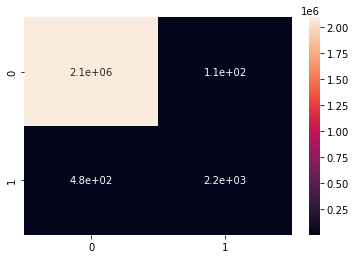

In [110]:
sns.heatmap(confusion_matrix(y_test, preds_ctb),annot=True)

## Model Staking

**In this we will combine above models by taking mode of the predictions of each row**

In [121]:
preds=pd.DataFrame({'catboost':preds_ctb,'random_forest':rcf_preds,'XGboost':preds_xgb})

In [123]:
preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099665 entries, 0 to 2099664
Data columns (total 3 columns):
 #   Column         Dtype
---  ------         -----
 0   catboost       int64
 1   random_forest  int64
 2   XGboost        int64
dtypes: int64(3)
memory usage: 48.1 MB


In [125]:
final_preds = preds.mode(axis=1)

In [126]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,final_preds))
print('-----------------------------------------------------------\n')
print('Confusion metrix\n')
print(confusion_matrix(y_test, final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.98      0.77      0.86      2666

    accuracy                           1.00   2099665
   macro avg       0.99      0.88      0.93   2099665
weighted avg       1.00      1.00      1.00   2099665

-----------------------------------------------------------

Confusion metrix

[[2096966      33]
 [    623    2043]]


** Above results shows the final accuracy, precision and f1-score**